Loading serialized data for data profilling, using pickle since JSON creates much larger file sizes:

In [11]:
import codecs, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
from tqdm import tqdm

num_classes = 43
IMAGE_SIZE = 32

train_data = pickle.load(open("serialized_data/train_data_numpy", "rb"))
train_labels = pickle.load(open("serialized_data/train_labels_numpy", "rb"))
test_data = pickle.load(open("serialized_data/test_data_numpy", "rb"))

label_json = codecs.open("DataProfiling/label_names.json", 'r', encoding='utf-8').read()
label_names = json.loads(label_json)

Dataset statistics and preview:


Shape of training data:  (39209, 32, 32, 3)
Shape of test data:  (12630, 32, 32, 3)
Number of classes: 43
Images resized to 32 x 32


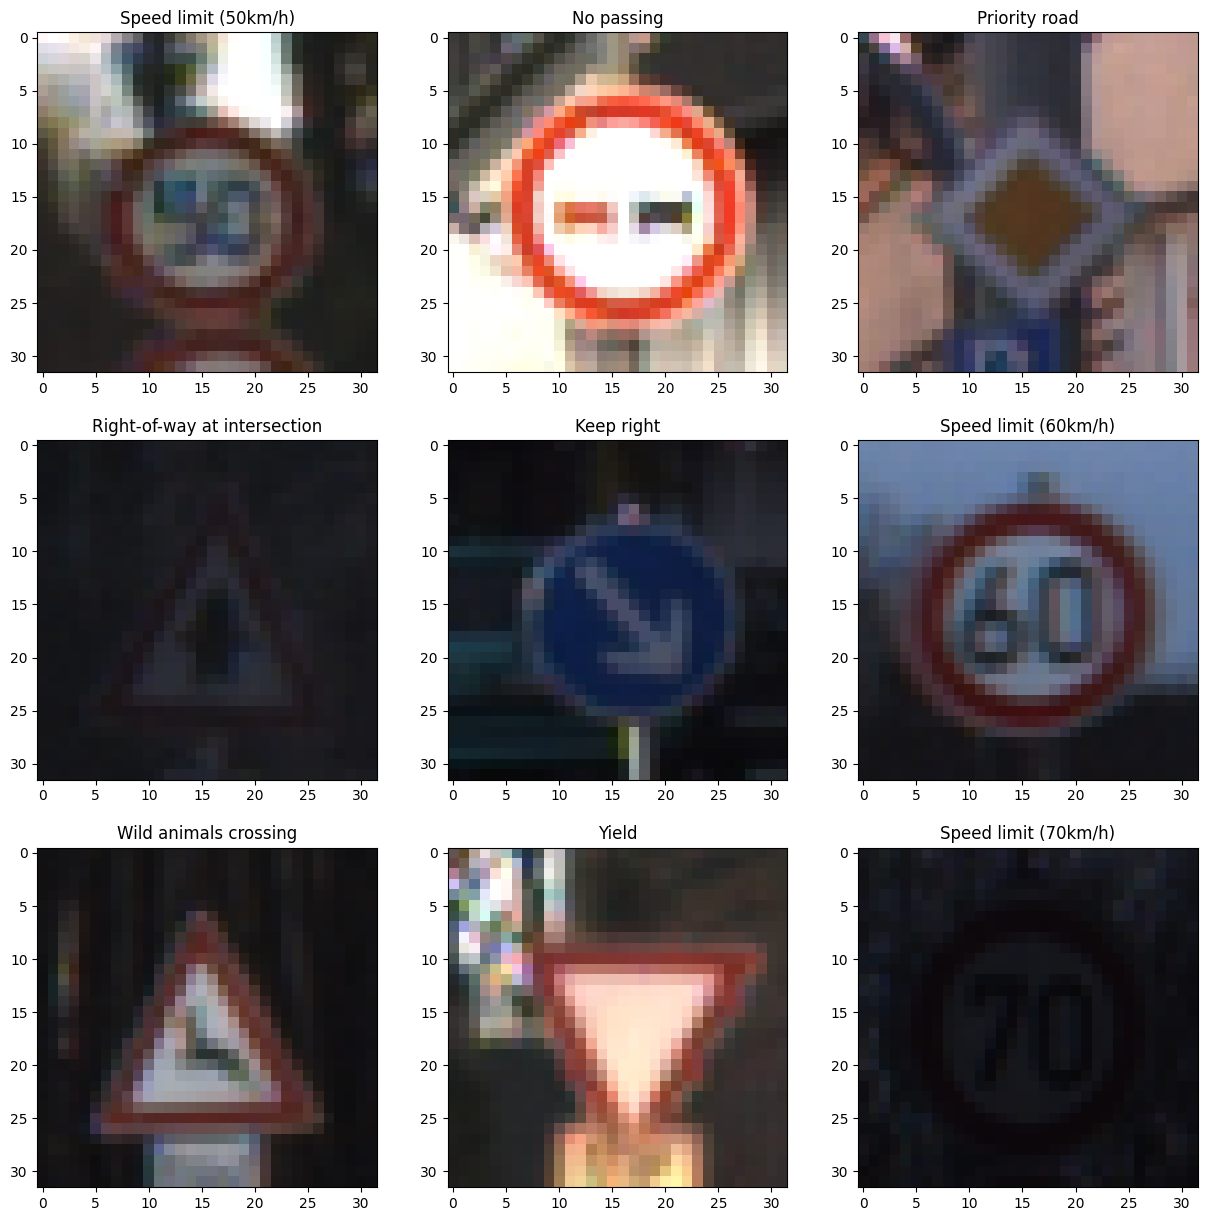

In [12]:
print("\nShape of training data: ", train_data.shape)
print("Shape of test data: ", test_data.shape)
print(f"Number of classes: {num_classes}")
print(f"Images resized to {IMAGE_SIZE} x {IMAGE_SIZE}")

plot_size = 3
random_idxs = [random.randint(0, train_data.shape[0]) for i in range(plot_size**2)]
fig = plt.figure(figsize=(15, 15))
for i, index in enumerate(random_idxs):
    a=fig.add_subplot(plot_size,plot_size, i+1)
    imgplot = plt.imshow(train_data[index])
    a.set_title(label_names[str(train_labels[index]+1)])
plt.show()

Class distribution:

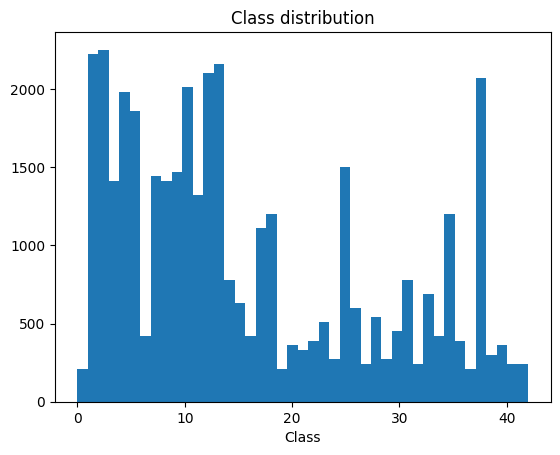

In [13]:
fig, ax = plt.subplots()
values, bins, patches = ax.hist(train_labels, num_classes)
ax.set_xlabel('Class')
ax.set_title('Class distribution')
plt.show()